# House Price Competition - Comprehensive Data Exploration

This notebook is designed to explore the dataset provided for the House Price Competition. If you use this notebook or find it helpful, **please give it an upvote!**

My others notebooks on various topics can be found on Kaggle [here](https://www.kaggle.com/thomaswoolley/notebooks) and on GitHub [here](https://github.com/Woolley12345/kaggle-competitions).


### Competition Overview

The aim of this competition is to predict the sales price of various houses given a number of features. This makes this a regression problem (predicting a continuous variable e.g. price) rather than a classification problem (predicting distinct classes/groups e.g. survived or not). In order to approach this competition (or any data science problem for that matter), it is essential to first understand the data that we are working with. The aim of this notebook is to develop that understanding of the data. A follow-up notebook will focus on the predictions of house sale prices.

### Notebook Structure
This notebook is structured into three main sections as follows:

1. Load Modules and Data
2. Initial Data Cleaning and Exploration
3. Feature Distributions and Correlations



# 1. Load Modules and Data

As the first step, we have to load in the data that we want to use. It is also important to load in some modules. Modules help us to do additional things with Python such as plotting, mathematics and data processing. Some commonly used modules are imported below to help us explore the data we have been given. For more information on the modules that are used here, check out the documentation at the following links:

* [Numpy](https://numpy.org)
* [Pandas](https://pandas.pydata.org)
* [MatplotLib](https://matplotlib.org)
* [Seaborn](https://seaborn.pydata.org)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt #plottting
import seaborn as sns # more plotting

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv


The output of the above cell provides us with the paths to the data files that we wish to import. They are saved as *.csv* files and so all we have to do is use the *read_csv* option in the *Pandas* module. The following code saves the data as a *Pandas Dataframe* (you can imagine it like a table of data) with the variable name *train_data*.

In [2]:
# Load in only the training data as this is what we will be exploring 
train_data = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")

# 2. Initial Data Cleaning and Exploration

Now that we have a new data set, it is important to get a quick idea of the features available to us. It is then often helpful to clean the data (this means that we make the data more manageable by removing unneccessary features and filling in missing values if possible). This section does some initial data cleaning that makes it easier for us to interpret the data later on.

## 2.1. Seeing What Data We Have

First, let's take a look at the available features by printing the column values. We can also show the first 5 rows of the *Dataframe* using *.head(5)* as shown below.

In [3]:
# Print the features and the first 5 rows of the dataset
print(train_data.columns.values)
train_data.head(5)

['Id' 'MSSubClass' 'MSZoning' 'LotFrontage' 'LotArea' 'Street' 'Alley'
 'LotShape' 'LandContour' 'Utilities' 'LotConfig' 'LandSlope'
 'Neighborhood' 'Condition1' 'Condition2' 'BldgType' 'HouseStyle'
 'OverallQual' 'OverallCond' 'YearBuilt' 'YearRemodAdd' 'RoofStyle'
 'RoofMatl' 'Exterior1st' 'Exterior2nd' 'MasVnrType' 'MasVnrArea'
 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond' 'BsmtExposure'
 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF'
 'TotalBsmtSF' 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' '1stFlrSF'
 '2ndFlrSF' 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath'
 'FullBath' 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'KitchenQual'
 'TotRmsAbvGrd' 'Functional' 'Fireplaces' 'FireplaceQu' 'GarageType'
 'GarageYrBlt' 'GarageFinish' 'GarageCars' 'GarageArea' 'GarageQual'
 'GarageCond' 'PavedDrive' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'PoolQC' 'Fence' 'MiscFeature'
 'MiscVal' 'MoSold' 'YrSold' 'SaleTy

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


From the above output, it is clear that there are many features in the data that describe the houses. It is important not to panic at this stage because whilst there are a lot of features, we can take it one step at a time to learn about them. You may have also noticed that one of the features is 'SalePrice' (i.e what we would like to predict in the competition). The SalePrice is contained in the training set that we have imported because before we make any predictions, we have to be able to build a model based on already known SalePrices.

From looking at the table output, it is clear that the data is not all the same type. The four types of data we have are:
* Numerical and continuous data (e.g. LotFrontage) 
* Numerical and categorical data (e.g. MSSubClass)
* Text-Based and categorical data (e.g. LotShape)
* Missing data (e.g. NaNs in PoolQC)

This is fairly typical of real world data in the sense that it is not perfect and requires cleaning and preparing before we can use it to make predictions. For now, we won't get into too much feature engineering (the name given to preparing data for models) but we will do a small amount of data cleaning to make the data more manageable.

## 2.2. Removing Features With Too Many Missing Values

In general, when we have missing values in our data there are two ways to handle them. The first is to fill in the missing values by using correlations between other features to predict the 'correct' value. This works well when only a few values are missing and the values are reasonably predictable. However, when the number of missing values is too large it is difficult to fill them in a meaningful way. As such, it can be much more helpful to drop those features instead of trying to train a model on them.

We will now check the number of missing values for each feature in our dataset and remove the ones that we think are not easily fillable (i.e. they have too many missing values).

In [4]:
# Print the length of the data
print("# of training Rows = ", len(train_data))

# Check for NaNs in the data
print("NaNs in each training Feature")
dfNull = train_data.isnull().sum().to_frame('nulls')
print(dfNull.loc[dfNull['nulls'] > 0]) # Print only features that have Null values

# of training Rows =  1460
NaNs in each training Feature
              nulls
LotFrontage     259
Alley          1369
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
PoolQC         1453
Fence          1179
MiscFeature    1406


Firstly, from the output we know that there are 1460 training rows. This would be considered as quite a small amount of rows for a more general problem, but as a learning competition this will be sufficient.

Secondly, we can tell from the above list that there are some features that contain NaN values. The ones with really high numbers of NaNs (> 600) should be removed as it will be very difficult to fill in the missing values to train a model on. This means that we should drop the following features before doing anymore data exploration:
* Alley
* FireplaceQu
* PoolQC
* Fence
* MiscFeature

We have kept the feature 'LotFrontage' in the training data here even though it has a non-negligible number of missing values (259). Before training a model, we will have to fill in these values but that is for the next notebook. For now, we just care about understanding the data.

In [5]:
# Drop the features mentioned above
train_data.drop(columns=['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], inplace=True)

# Checking if any features take all the same value in which case they could be removed (in this case none are removed)
for i in train_data.keys():
    if len(pd.unique(train_data[i])) < 2:
        print(i)

# 3. Feature Distributions and Correlations

Now that we have done some preliminary data cleaning (i.e. removing the columns that we don't need) we can start exploring the dataset to see what distributions and correlations between features exist. There is no 'perfect' way of exploring data so my advice is to get stuck in and see what you find.

## 3.1. Feature Correlations

I always think it is a good idea to plot a quick heatmap at the start in order to get an overview of some obvious correlations. A heatmap will tell you a large amount of information about the variables in only a couple of lines of code! Perfect! The heatmap will however not show correlations of text-based categories because they must be converted to numbers first. We can plot a heatmap as shown below.

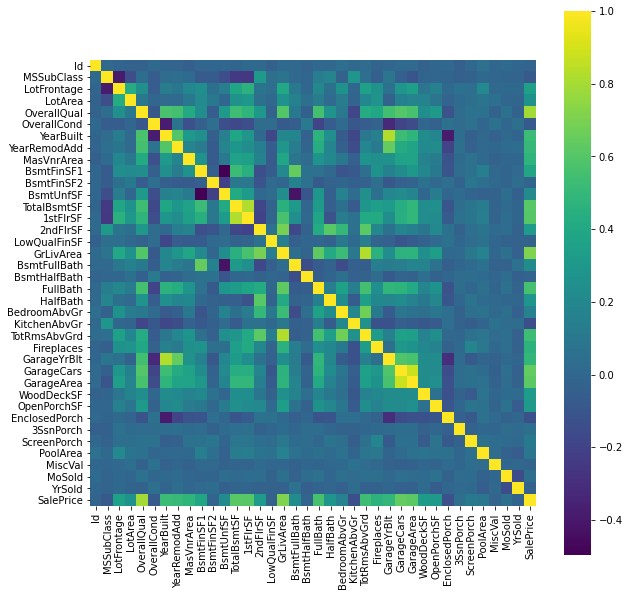

In [6]:
# Plot a heatmap of the correlations for a quick check on the numerical features
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(train_data.corr(), annot = False, cmap='viridis', square=True)

Now the above heatmap shows correlations between variables by the colour of the square. With the color scheme (called a colour map) that I have used, yellow shows strong positive correlations whereas purple shows strong negative correlations. Blue shows that there is a minimal, if any, correlation between two variables.

Note: the yellow diagonal line through the middle is where the correlation between the same feature is measured (i.e. the correlation between SalePrice and SalePrice is obviously 1).

Using this colour scheme, we can see that there are some strong correlations. These include but are definitely not limited to:
* GarageCars and GarageArea (which is makes sense as the bigger the garage the more cars can fit in it)
* GarageYrBlt and YearBuilt (which again makes sense as garages are likely built at the same time as the house)
* GrLivArea and TotRmsAbvGrd

I have not listed all the strong (anti-) correlations for the sake of space but you can always refer back to this heatmap to check how two variables may be correlated.

## 3.2. Exploring SalePrice

### 3.2.1. SalePrice Distribution

Before we go any further, it is worthwhile taking a look at the feature 'SalePrice'. This is after all the quantity that we are aiming to predict. We can start by plotting a histogram of the SalePrice data as outlined below.

[Text(0.5, 0, 'SalePrice ($1000s)')]

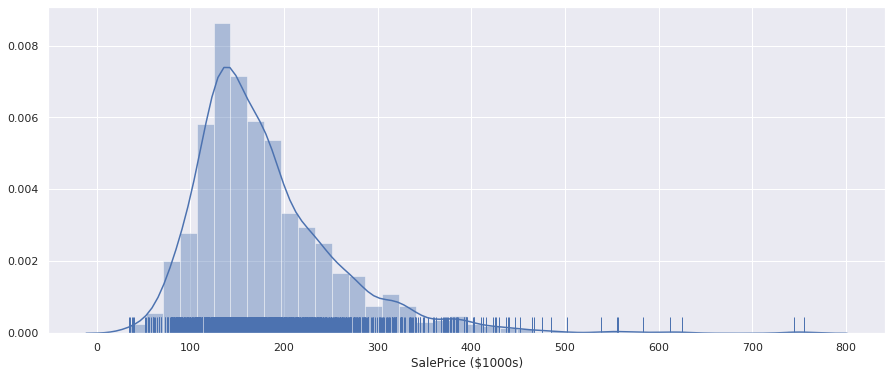

In [7]:
# Make histogram of SalePrice using seaborn
sns.set(color_codes=True)
fig, ax = plt.subplots(1,1, figsize=(15,6))
sns.distplot(train_data['SalePrice']/1000.,ax=ax, bins=40, rug=True) # Plot price in $1000s
ax.set(xlabel='SalePrice ($1000s)')

From the histogram we can see that the distribution deviates from normal with positive skewness. There are also some outliers in terms of SalePrice. We may want to exclude these in the training data to improve our model. In fact, there are very few houses worth more than $500,000.

### 3.2.2. SalePrice Correlations

Next we can list the strongest (anti-)correlations to SalePrice from the heatmap above. It is definitely important to know which features are closely (anti-)correlated to the SalePrice as these will be the features that help our prediction to be as accurate as possible.

In [8]:
# Find the 10 largest correlations to SalePrice
bigCorr = train_data.corr().nlargest(10, 'SalePrice')['SalePrice']
print(bigCorr)

# Find the 10 largest anti-correlations to SalePrice
bigAnti = train_data.corr().nsmallest(10, 'SalePrice')['SalePrice']
print(bigAnti)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64
KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
Name: SalePrice, dtype: float64


It is always a good idea to think about the most correlated features and see if they are logical. As an example, it makes sense that SalePrice is closely correlated to the GrLivArea as bigger houses are more expensive. We can repeat this for each feature to sense check that the data is behaving as we would expect. 

Now that we know what the strongest correlated features to SalePrice are, it is worthwhile exploring their distributions. We can do this with one line of code as below.

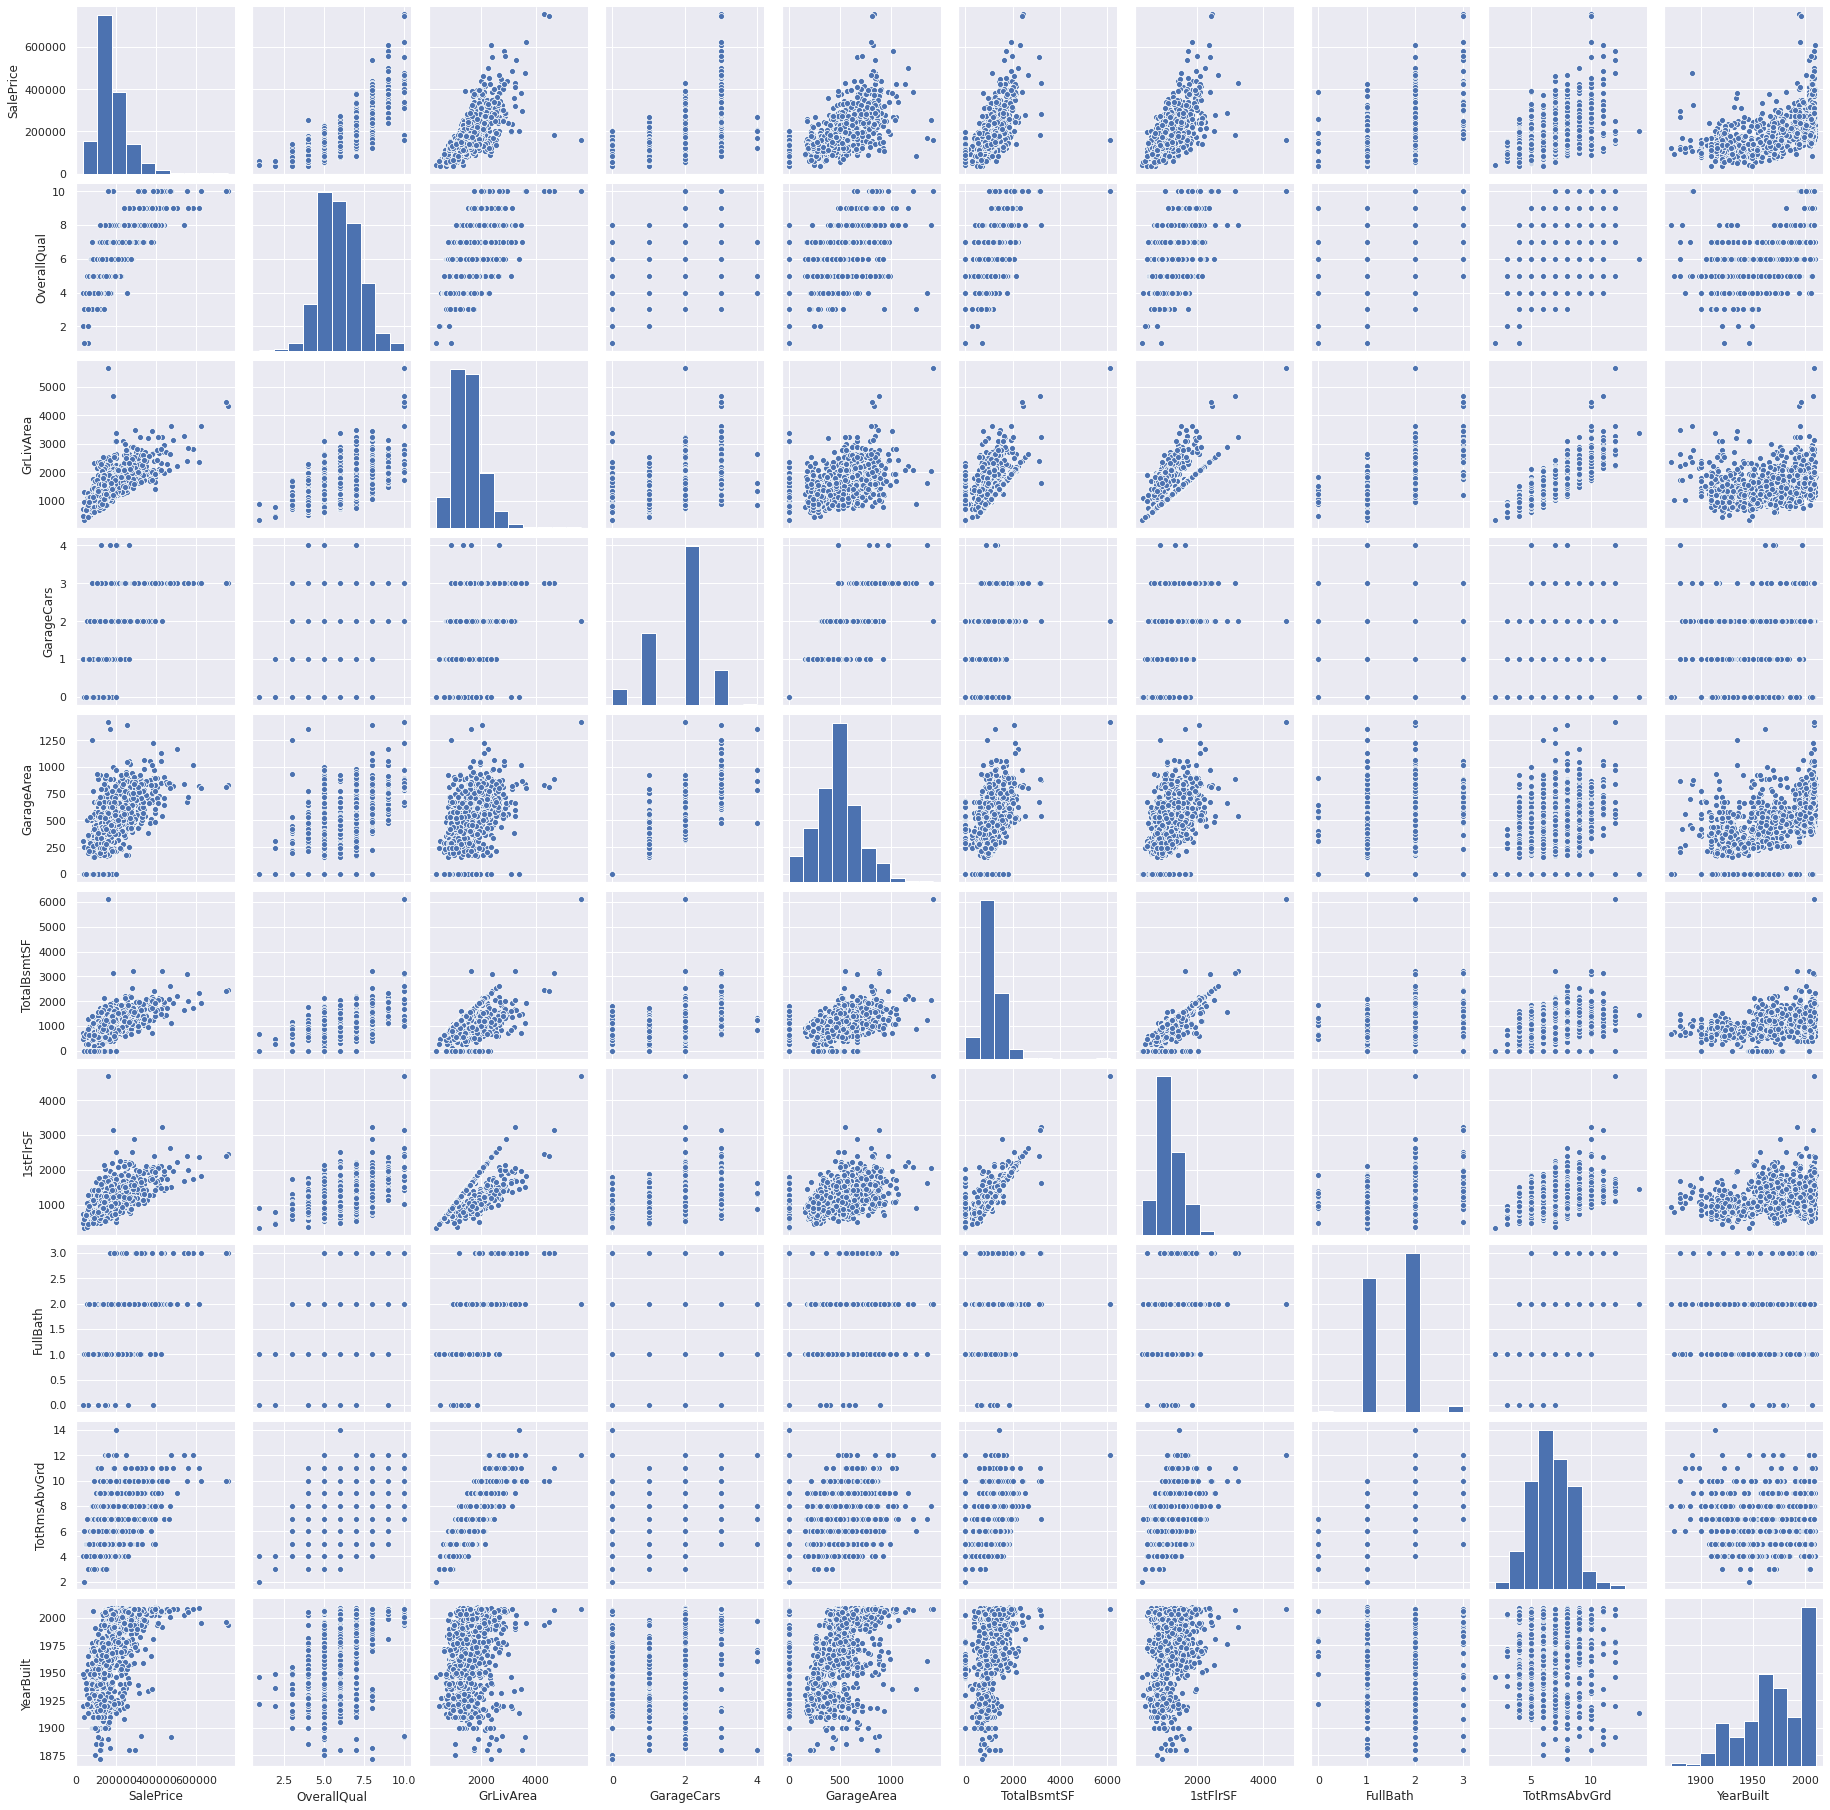

In [9]:
sns.pairplot(train_data[bigCorr.index])

Now that is A LOT of plots! 

I won't (and can't!) detail every bit of information that we can get from the above plots, but it is worth having a look at the output above to get some more intuition about the dataset. On the diagonal, for example, we can see histograms of the features. This tells us that some of the features approximate normal distributions (e.g. TotRmsAbvGrd) whereas others are more uniform (e.g. FullBath).

There are also some obvious outliers in the data that may need to be removed when we are fitting our models. This is good to know and be prepared for.

As the 10 strongest anti-correlations are much weaker than the 10 strongest correlations, we will not make all the plots for the anti-correlations but this could be done using one line of code as above.


## 3.3. Feature Distributions

### 3.3.1. Numerical Features
We can get a quick overview of the distributions of all numerical features by plotting histograms for them as shown below.

/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:3

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc3c7e07c88>,
      dtype=object)

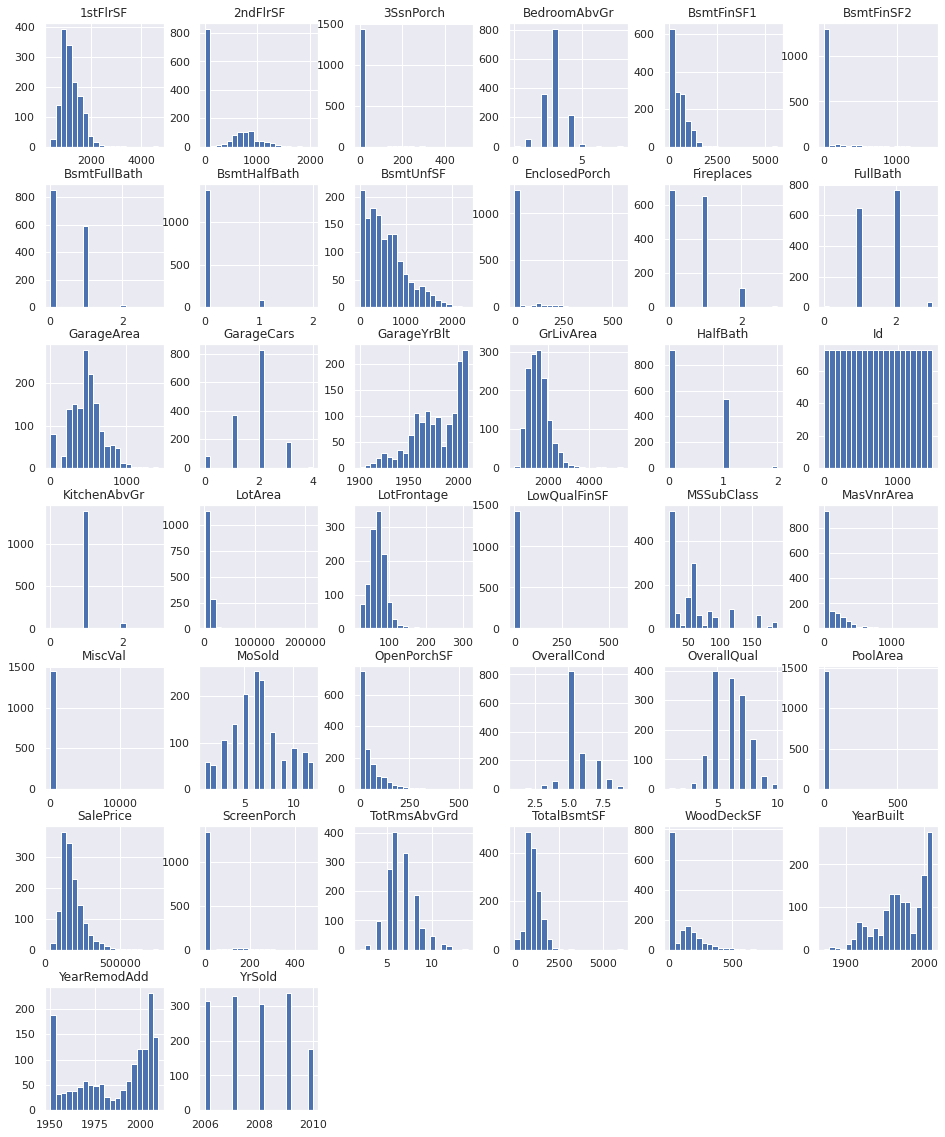

In [10]:
train_data.hist(figsize=(16,20), bins=20)

Whilst we won't really discuss the distributions of most of the features here. This is another good way to summarise the data and may be helpful if you encounter problems with features further down the line.

### 3.3.2. Text-Based Categorical Features
We can also now look at the distributions of the text based categorical features. As an example, we plot the ExterQual feature against a few continuous and categorical features. Again, we don't do this for all of the possible combinations for brevity.



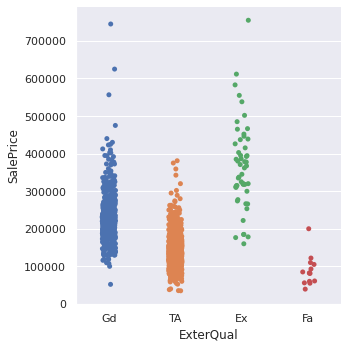

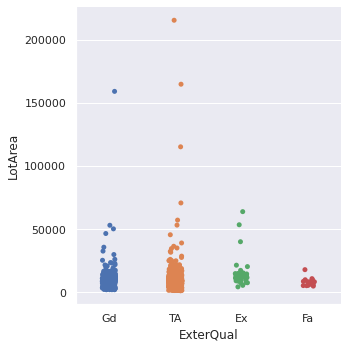

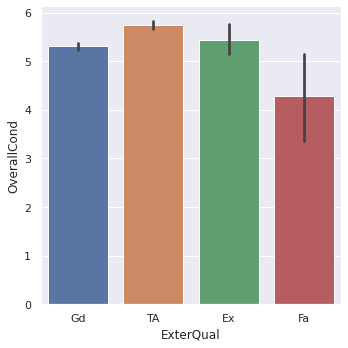

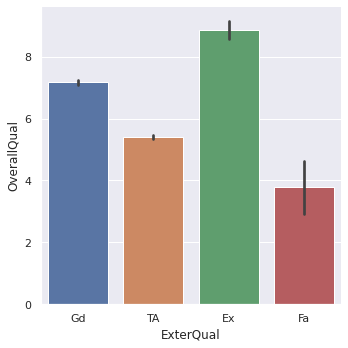

In [11]:
# Make a list of the continuous and categorical features to plot
continuous_keys = ['SalePrice', 'LotArea']
categorical_keys = ['OverallCond', 'OverallQual']

# Iterate through each feature and plot
for i in continuous_keys:
    sns.catplot(x = 'ExterQual',y=i, data = train_data)
for i in categorical_keys:
    sns.catplot(x = 'ExterQual',y=i, kind='bar', data = train_data)

## 3.4. LotFrontage

As the LotFrontage feature had a lot of missing values, it is worth checking what it is most correlated to. This will help us decide if it is possible to fill the missing values by using other known features about the property. We can check the correlations of LotFrontage in the same way we did for SalePrice.

In [12]:
# Find the 10 largest correlations to SalePrice
bigCorr = train_data.corr().nlargest(10, 'LotFrontage')['LotFrontage']
print(bigCorr)

# Find the 10 largest anti-correlations to SalePrice
bigAnti = train_data.corr().nsmallest(10, 'LotFrontage')['LotFrontage']
print(bigAnti)

LotFrontage     1.000000
1stFlrSF        0.457181
LotArea         0.426095
GrLivArea       0.402797
TotalBsmtSF     0.392075
TotRmsAbvGrd    0.352096
SalePrice       0.351799
GarageArea      0.344997
GarageCars      0.285691
Fireplaces      0.266639
Name: LotFrontage, dtype: float64
MSSubClass      -0.386347
OverallCond     -0.059213
Id              -0.010601
BsmtHalfBath    -0.007234
KitchenAbvGr    -0.006069
MiscVal          0.003368
YrSold           0.007450
EnclosedPorch    0.010700
MoSold           0.011200
LowQualFinSF     0.038469
Name: LotFrontage, dtype: float64


From the output, we can see that there are quite a few features that are strongly correlated with LotFrontage. This should help us fill in the missing values and so for now, we will not drop the LotFrontage feature.

Okay that's all for now as an initial look at the data for this competition. If you are planning on making predictions with this dataset I would recommend repeating this analysis for most of the features just to understand how they are related to each other. Finally, if you've got this far **please give this an upvote, it really helps!**.
